In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from keras.models import Sequential

In [3]:
# define a classifier and add Conv Archetectre :

In [4]:
seed = 43
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
classifier = Sequential()

In [6]:
# add Conv layers to the classifier :
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# Pooling
classifier.add(MaxPool2D(pool_size = (2, 2)))
# Add additional convolutional layer with pooling
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))
#  Flattening
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


#### Preprocess the images using tf.keras.preprocessing.image of ImageDataGenerator :

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# training data  : process
train_datagen = ImageDataGenerator(rescale=1./255)
# test data generator :
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
# training set :
training_set = train_datagen.flow_from_directory(directory="./gender/Training", target_size=(64,64),batch_size=32,class_mode='binary')

Found 47012 images belonging to 2 classes.


In [10]:
# testing set :
testing_set = test_datagen.flow_from_directory(directory="./gender/Validation", target_size=(64,64),batch_size=32,class_mode='binary')

Found 11649 images belonging to 2 classes.


In [11]:
# train the model :
classifier.fit_generator(training_set,steps_per_epoch=1000,epochs=4,validation_data=testing_set,validation_steps=2500,shuffle=False,verbose=1)

C:\Users\popul\AppData\Local\Temp\ipykernel_10996\4097358723.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,steps_per_epoch=1000,epochs=4,validation_data=testing_set,validation_steps=2500,shuffle=False,verbose=1)


Epoch 1/4


1000/1000 [==============================] - 282s 280ms/step - loss: 0.2798 - accuracy: 0.8730 - val_loss: 0.1607 - val_accuracy: 0.9407
Epoch 2/4
1000/1000 [==============================] - 115s 115ms/step - loss: 0.1654 - accuracy: 0.9385
Epoch 3/4
1000/1000 [==============================] - 74s 74ms/step - loss: 0.1494 - accuracy: 0.9445
Epoch 4/4
1000/1000 [==============================] - 69s 69ms/step - loss: 0.1357 - accuracy: 0.9496


In [12]:
new_img = keras.preprocessing.image.load_img("./test_data/test_16.jpg",target_size=(64,64))


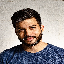

In [13]:
new_img

In [14]:
training_set.class_indices

{'female': 0, 'male': 1}

In [15]:
new_img_ = keras.preprocessing.image.img_to_array(new_img)
new_img_ = np.expand_dims(new_img_,axis=0)
result = classifier.predict(new_img_)

1/1 [==============================] - 0s 189ms/step


In [16]:
result

array([[1.]], dtype=float32)

In [17]:
new_img_

array([[[[194., 190., 181.],
         [153., 146., 138.],
         [184., 177., 169.],
         ...,
         [198., 186., 172.],
         [131., 115., 100.],
         [ 58.,  41.,  25.]],

        [[175., 167., 156.],
         [173., 166., 156.],
         [157., 151., 139.],
         ...,
         [195., 188., 180.],
         [203., 196., 186.],
         [184., 180., 169.]],

        [[181., 174., 168.],
         [195., 188., 182.],
         [179., 172., 164.],
         ...,
         [190., 185., 179.],
         [196., 189., 181.],
         [212., 208., 199.]],

        ...,

        [[  5.,   8.,  15.],
         [ 24.,  41.,  71.],
         [  0.,   4.,   7.],
         ...,
         [  0.,   9.,  45.],
         [  5.,  23.,  61.],
         [107., 126., 158.]],

        [[ 34.,  50.,  76.],
         [ 14.,  12.,  33.],
         [  2.,  10.,  21.],
         ...,
         [ 75.,  94., 136.],
         [ 41.,  56.,  97.],
         [ 79., 101., 138.]],

        [[ 22.,  33.,  55.],
       

In [18]:
if result[0][0] == 1:
    prediction = 'Male'
elif (result[0][0] == 0):
    prediction = 'Female'
else:
    prediction = 'Cannot Recognize'
    
print(prediction)

Male
